# Curva Normal
uma Distribuição normal  é uma distribuição de probabilidade de uma variavel aleatoria X, cujo o gráfico é chamado de curva normal.
Onde:
- Média = Mediana = Moda
- Distribuição é simétrica
- Area é igual a 1
- A area distante nunca toca o eixo x

<img src="https://www.inf.ufsc.br/~andre.zibetti/probabilidade/figures/normal.PNG" alt="curva Normal" width="70%">



## Prorpiedades de uma Distribuição normal

### Função Densidade de Probabilidade (FDP)

Necessita de dois ponto para ser usada:
- Area da curva igual a 1
- A função ser positiva

<img src="https://geokrigagem.com.br/wp-content/uploads/2021/09/image-14-1024x131.png" alt="fdp formula" width="70%">

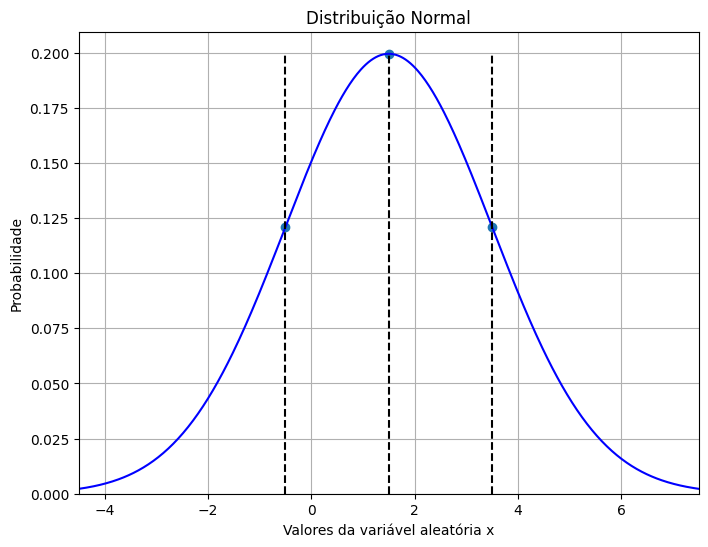

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Criação de uma distribuição normal com média 1.5 e desvio padrão 2.0
media, desvpad = 1.5, 2.0
distnorm = stats.norm(media, desvpad)
### Representação gráfica
# Geração de QUANT pontos no intervalo entre INICIO e FIM
QUANT, INICIO, FIM = 500, media-3*desvpad, media+3*desvpad
x = np.linspace(INICIO, FIM, QUANT)
y = distnorm.pdf(x)
# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b')
plt.xlim(INICIO, FIM)
plt.ylim(0, distnorm.pdf(media)+0.01)
#fru fru para adicionar
plt.title('Distribuição Normal')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('Probabilidade')
plt.scatter([media - desvpad, media, media + desvpad],
            [distnorm.pdf(media-desvpad), distnorm.pdf(media), distnorm.pdf(media+desvpad)])
plt.vlines([media- desvpad, media, media + desvpad], 0, distnorm.pdf(media),
           colors='k', linestyles='dashed')
plt.grid()
plt.show()

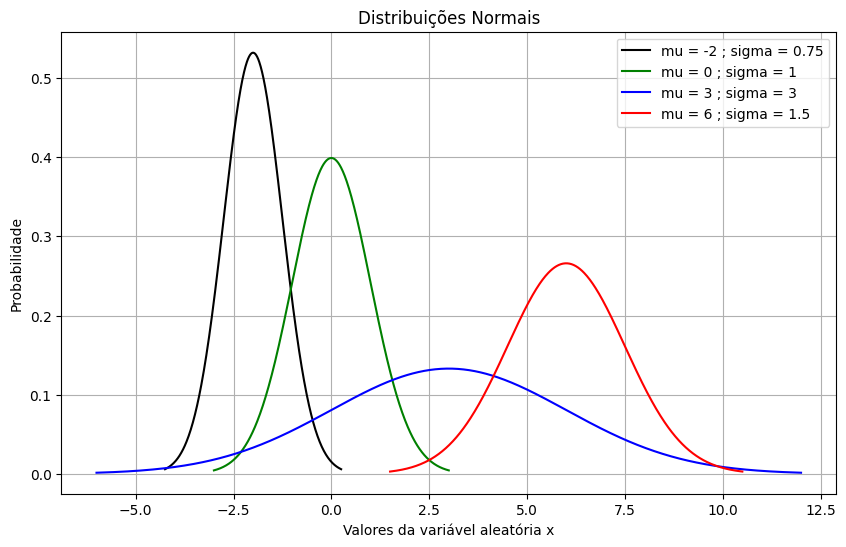

In [3]:
## Plotando várias distribuições normais
# Médias e desvios padrão
medias = [-2, 0, 3, 6]
desvios = [0.75, 1, 3, 1.5]
# Cores das curvas
cores = ['k', 'g', 'b', 'r']
# Tamanho da figura
plt.figure(figsize=(10, 6))
# Plotagem dos gráficos
for mu, std, cor in zip(medias, desvios, cores):
  normal = stats.norm(mu, std)
  QUANT, INICIO, FIM = 500, mu-3*std, mu+3*std
  x = np.linspace(INICIO, FIM, QUANT)
  y = normal.pdf(x)
  plt.plot(x, y, cor)
# Atributos do gráfico
plt.title('Distribuições Normais')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('Probabilidade')
plt.legend(['mu = -2 ; sigma = 0.75',
            'mu = 0 ; sigma = 1',
            'mu = 3 ; sigma = 3',
            'mu = 6 ; sigma = 1.5'])
plt.grid(True)
plt.show()

## Função de distribuição acumulativa (fdc) e Função de sobrevivência (fs)

O comando cdf (fdc) server para achar a porcentagem a esquerda de uma distribuição normal

O comando sf (fs) serve para achar a porcentagem a direita de uma distribuição normal

In [4]:
# Definição da distribuição normal padrão
media, std = 0, 1
normpad = stats.norm(media, std)
# Área acumulada que corresponde a um escore-z de –2,19
area1 = normpad.cdf(-2.19)
print(f'A área acumulada correspondente a z = -2.19 é {area1:.4f}.')
# Área acumulada que corresponde a um escore-z de 2,17
area2 = normpad.cdf(2.17)
print(f'A área acumulada correspondente a z = 2.17 é {area2:.4f}.')
# Área sob a curva normal padrão à direita de z = 1,06
area3 = normpad.sf(1.06) # Isso equivale a area3 = 1 - normpad.cdf(1.06)
print(f'A área sob a curva normal à direita de z = 1.06 é {area3:.4f}.')
# Área sob a curva normal padrão entre z = –1,5 e z = 1,25
area4 = normpad.cdf(1.25) - normpad.cdf(-1.5)
print(f'A área sob a curva normal entre z = -1.5 e z = 1.25 é {area4:.4f}.')

A área acumulada correspondente a z = -2.19 é 0.0143.
A área acumulada correspondente a z = 2.17 é 0.9850.
A área sob a curva normal à direita de z = 1.06 é 0.1446.
A área sob a curva normal entre z = -1.5 e z = 1.25 é 0.8275.


Exercicio resolvido usando sf e criando tabela apenas com media e desvio padrão

**Exercício:** A velocidade média dos veículos que passam em um trecho de uma rodovia é 67 milhas por hora, com desvio padrão de 3,5 milhas por hora.

Um veículo é selecionado de forma aleatória. Qual é a probabilidade de que ele esteja ultrapassando o limite de velocidade de 70 milhas por hora? Suponha que as velocidades são normalmente distribuídas.


In [5]:
media, std = 67, 3.5
LIMITE = 70
velocidades = stats.norm(loc=media, scale=std)
prob = velocidades.sf(LIMITE)
print(f'A probabilidade de ultrapassar o limite de {LIMITE} mi/h é de {100*prob:.2f}%.')

A probabilidade de ultrapassar o limite de 70 mi/h é de 19.57%.


# Achando Escore-z

Para acharmos o valor de z usamos a fórmula:

<img src="https://blog.proffernandamaciel.com.br/wp-content/uploads/2022/05/WhatsApp-Image-2022-05-31-at-13.40.16.jpeg" alt="formula z para x">

com essa formula pode achar o valor de x usando

> x = media + z * desvio padrao(sigma)

Há uma forma de calcular o valor do escore-z a partir da probabilidade, usamos a função de ponto percentual (fpp)

In [6]:
# Construindo a distribuição normal padrão
mu, std = 0, 1
normpad = stats.norm(mu, std)
# Escore-z que tenha 96,16% da área de distribuição à sua direita
z1 = normpad.ppf(1-0.9616)
print(f'z1 = {z1:.3f}')
print(f'Conferindo... Área à direita = {normpad.sf(z1)*100:.2f}%')
# Escore-z para o qual 95% da área de distribuição esteja entre –z e z
z2 = normpad.ppf(0.05)
print(f'z2 = {z2:.3f}')
print(f'Conferindo... Área à esquerda de z = {z2:.3f} é {normpad.cdf(z2)*100:.2f}%')
print(f'Conferindo... Área à direita de z = {-z2:.3f} é {normpad.sf(-z2)*100:.2f}%')

z1 = -1.770
Conferindo... Área à direita = 96.16%
z2 = -1.645
Conferindo... Área à esquerda de z = -1.645 é 5.00%
Conferindo... Área à direita de z = 1.645 é 5.00%


**Exercicios** 

Um pesquisador testa as distâncias de frenagem de diversos carros. A distância de frenagem de 60 milhas por hora até uma parada completa em pista seca é medida em pés. As distâncias de frenagem de uma
amostra de carros são normalmente distribuídas, com média de 129 pés e desvio padrão de 5,18 pés.

Qual é a maior distância de frenagem que um desses carros poderia ter e ainda estar no grupo do 1% mais baixo? (*Adaptado de: Consumer Reports*)


In [7]:
# Construindo a distribuição normal das distâncias de frenagem
mu, std = 129, 5.18
normpad = stats.norm(mu, std)
# Distância máxima com 1% da área de distribuição à sua esquerda
dist = normpad.ppf(0.01)
print(f'Distância máxima = {dist:.2f} pés')
print(f'Conferindo... Área à esquerda = {normpad.cdf(dist)*100:.2f}%')

Distância máxima = 116.95 pés
Conferindo... Área à esquerda = 1.00%


# Média amostrais

Uma distribuição amostral é a distribuição de probalidade de uma estatistica amostral que é formada que é formada quando amostras de tamanho n são repetidamente extraídas de uma população. Assim tendo entãoa  distribuição amostral das médias. cada estatística amostral tem sua distribuição amostral.

## Teorema de limite central

Se amostras de tamanho n, em que n ≥ 30, são retiradas ao acaso de uma população qualquer com uma média e um desvio padrão, então a distri buição amostral das médias se aproxima de uma distribuição normal. Quan to maior o tamanho da amostra, melhor a aproximação.

Se a população é normalmente distribuída, então a distribuição amostral das médias é normalmente distribuida para qualquer tamanho de amostra n.

<img src="https://cdn.discordapp.com/attachments/653700320953761794/1029585779997032448/unknown.png" alt="média das medias amostrais">

<img src="https://cdn.discordapp.com/attachments/653700320953761794/1029585816898515025/unknown.png" alt="variancia e desvPad das medias amostrais">

A distribuição das médias amostrais tem a mesma média que a população, mas o seu desvio padrão é menor que aquele da população. Isso nos diz que a distribuição das médias amostrais tem o mesmo centro que a população, porém é mais concentrada. Alémn disso, a distribuição das médias amostrais torna-se cada vez menos dispersa conforme o tamanho da amostra aumenta

<img src="https://cdn.discordapp.com/attachments/653700320953761794/1029586934709887056/unknown.png" alt="dist pop e amostral">


**Exercicio**
Os valores populacionais $\{1, 3, 5, 7\}$ são equiprováveis. Esses valores são escritos em pedaços de papel e colocados em uma caixa. Então, selecionam-se dois pedaços de papel aleatoriamente, com reposição.

*   **(a)** Liste todas as amostras possíveis de tamanho $𝑛 = 2$ e calcule suas respectivas médias.
*   **(b)** Encontre a média, a variância e o desvio
padrão das médias amostrais.
*   **(c)** Compare seus resultados com a média $\mu = 4$,
variância $\sigma^2 = 5$, e desvio padrão $\sigma \approx 2,236$ da população.

In [8]:
import itertools as it
import pandas as pd
## Item (a)
# Chave para permutação
chave = [1, 3, 5, 7]
# Geração de todas as amostras possíveis de tamanho 2
am2a2 = list(it.product(chave, repeat=2))
# Criação de tabela com possíveis amostras, acompanhadas de suas médias
amostras = pd.DataFrame({'Amostras': am2a2,
                        'Média': [(x1+x2)/2 for (x1, x2) in am2a2]})
display(amostras)

,Amostras,Média
0,"(1, 1)",1.0
1,"(1, 3)",2.0
2,"(1, 5)",3.0
3,"(1, 7)",4.0
4,"(3, 1)",2.0
5,"(3, 3)",3.0
6,"(3, 5)",4.0
7,"(3, 7)",5.0
8,"(5, 1)",3.0
9,"(5, 3)",4.0


In [9]:
## Item (b)
# Determinação da frequência de cada média
contagem = amostras['Média'].value_counts().sort_index()
# Criação de tabela com as possíveis médias e suas respectivas probabilidades
dist_prob = pd.DataFrame({'Médias': contagem.index,
                         'Frequência': contagem})
dist_prob['Probabilidade'] = dist_prob['Frequência'] / dist_prob['Frequência'].sum()
display(dist_prob)
# Cálculo da média das médias amostrais
media_amostras = (dist_prob['Médias']*dist_prob['Probabilidade']).sum()
print(f'Média das médias amostrais = {media_amostras:.2f}')
# Cálculo da variância das médias amostrais
var_amostras = (dist_prob['Médias']**2*dist_prob['Probabilidade']).sum() - media_amostras**2
print(f'Variância das médias amostrais = {var_amostras:.2f}')
# Cálculo do desvio padrão das médias amostrais
std_amostras = var_amostras**(1/2)
print(f'Desvio padrão das médias amostrais = {std_amostras:.2f}')

,Médias,Frequência,Probabilidade
1.0,1.0,1,0.0625
2.0,2.0,2,0.1250
3.0,3.0,3,0.1875
4.0,4.0,4,0.2500
5.0,5.0,3,0.1875
6.0,6.0,2,0.1250
7.0,7.0,1,0.0625


Média das médias amostrais = 4.00
Variância das médias amostrais = 2.50
Desvio padrão das médias amostrais = 1.58


In [10]:
## Item (c)
mu, std = 4, 5**(1/2)
print('De acordo com a teoria das distribuições amostrais:')
print(f'A média mu_x = {media_amostras:.2f} deve ser igual a média populacional mu = {mu}.')
print(f'O desvio padrão sigma_x = {std_amostras:.2f} deve ser igual a sigma/raiz(n) = {std/(2**(1/2)):.2f}')

De acordo com a teoria das distribuições amostrais:
A média mu_x = 4.00 deve ser igual a média populacional mu = 4.
O desvio padrão sigma_x = 1.58 deve ser igual a sigma/raiz(n) = 1.58


## Probabilidades e o TLC (Teorema de limite central)

**Exercício:** O gasto médio com alojamento e refeição, por ano, em faculdades de quatro anos é de US\$ 9.126,00. Você seleciona aleatoriamente 9 dessas faculdades. Qual é a probabilidade de que a média de gastos com alojamento e refeição seja menor que US\$ 9.400,00?

Suponha que os gastos com alojamento e refeição sejam normalmente distribuídos, com desvio padrão de US$ 1.500,00 (*Adaptado de: National Center for
Education Statistics*).

In [11]:
# Determinação da média e desvio padrão amostrais
mu, std, n = 9126, 1500, 9
mu_x, std_x = mu, std/(n**(1/2))
# Geração da distribuição normal amostral (TLC)
gastos = stats.norm(mu_x, std_x)
# Cálculo da probabilidade
prob = gastos.cdf(9400)
print(f'A probabilidade de que os gastos sejam inferiores a US$ 94k é de {prob*100:.2f}%.')

A probabilidade de que os gastos sejam inferiores a US$ 94k é de 70.82%.


**Exercício:** A dívida média no cartão de crédito mantida por universitários é normalmente distribuída, com média de US\$ 3.173,00 e desvio padrão de
US\$ 1.120,00 (*Adaptado de: Sallie Mae*).

*   Qual é a probabilidade de que um universitário selecionado aleatoriamente,
que possui um cartão de crédito, tenha uma divida menor
que US\$ 2.700?
*   Você seleciona aleatoriamente 25 universitários que possuem cartão
de crédito. Qual é a probabilidade de que a média dessas dívidas
médias seja menor que US\$ 2.700?

In [12]:
'''No primeiro item, devemos calcular a probabilidade associada a um determinado
valor da variável aleatória dívida no cartão de crédito.'''
# Geração da distribuição normal da população
mu, std = 3173, 1120
divida_pop = stats.norm(mu, std)
# Cálculo da probabilidade
prob1 = divida_pop.cdf(2700)
print(f'P(dívida <= 2700.00) = {prob1*100:.2f}%.')
'''No segundo item, devemos calcular uma probabilidade associada a uma
média amostral.'''
# Geração da distribuição das médias amostrais
n = 25
mu_x, std_x = mu, std/(n**(1/2))
divida_amostra = stats.norm(mu_x, std_x)
# Cálculo da probabilidade
prob2 = divida_amostra.cdf(2700)
print(f'P(dívida média <= 2700.00) = {prob2*100:.2f}%.')

P(dívida <= 2700.00) = 33.64%.
P(dívida média <= 2700.00) = 1.74%.


# Estimativa Pontual

Uma nova amostra aleatória de horas semanais trabalhadas por 30 funcionários
de mercearias é mostrada na tabela a seguir:

<img src="https://cdn.discordapp.com/attachments/653700320953761794/1029744384205394020/unknown.png" alt="pd series horas">

Use essa amostra para encontrar outra estimativa pontual para a média populacional $\mu$.



In [13]:
import pandas as pd
# Dados amostrais
horas = pd.Series([26, 28, 32, 46, 32, 25, 22, 22, 20, 36,
                   32, 28, 25, 35, 38, 31, 25, 22, 22, 32,
                   28, 21, 26, 32, 22, 28, 40, 24, 48, 19])
# Estimativa da média populacional
x_barra = horas.mean()
print(f'Estimativa da média populacional = {x_barra:.2f} horas.')

Estimativa da média populacional = 28.90 horas.


# Estimativa intervalar e intervalo de confiaça

Uma estimativa intervalar é um intervalo, ou amplitude de valores, usando para estimar um parâmetro.

O nível de confiaça c é a probabilidade de que a estimativa intervalar contenha o parâmetro populacional, supondo que o processo de estimação é repetido um grande número de vezes.

A diferença de média moasral e estimativa pontual é chamado de erro de amostragem ou amostral.

Na maioria dos casos, a estimativa pontual, é desconhecida e a média da amostras varia de amostra para amostra

<img src="https://cdn.discordapp.com/attachments/653700320953761794/1029754015359172688/unknown.png" alt="formula margem de erro media">


Use os dados do da célula anterior para construir um intervalo de
confiança de 95% para o número médio de horas semanais trabalhadas
por funcionários de mercearias. Suponha que o desvio padrão da população
seja de 7,9 horas.

In [14]:
from scipy import stats as st
# Desvio padrão populacional conhecido
sigma = 7.9
# Nível de confiança
confianca = 0.95
# Desvio padrão da distribuiução normal das médias amostrais
n_amostras = 30
sigma_x = sigma/n_amostras**0.5
# Intervalo de confiança de 95% para a média populacional
int_confianca = st.norm.interval(alpha=confianca, loc=x_barra, scale=sigma_x)
print('*** Intervalo de conficança 95% para a média populacional ***')
print(f'({int_confianca[0]:.2f}, {int_confianca[1]:.2f})')

*** Intervalo de conficança 95% para a média populacional ***
(26.07, 31.73)


C:\Users\Pichau\AppData\Local\Temp\ipykernel_7988\1408293841.py:10: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  int_confianca = st.norm.interval(alpha=confianca, loc=x_barra, scale=sigma_x)


# Alterando o nível de confiança
Use os dados do exemplo anterior para construir intervalos de
confiança de 75%, 85% e 90% para o número médio de horas trabalhadas
por funcionários de mercearias. Como muda a largura do intervalo
de confiança à medida que o nível de confiança aumenta?

*** Intervalos de conficança para a média populacional ***
75.0% --> (27.24, 30.56)
85.0% --> (26.82, 30.98)
90.0% --> (26.53, 31.27)


C:\Users\Pichau\AppData\Local\Temp\ipykernel_7988\3782626818.py:5: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  intervalos = [st.norm.interval(alpha=nivel, loc=x_barra, scale=sigma_x) for nivel in niveis]


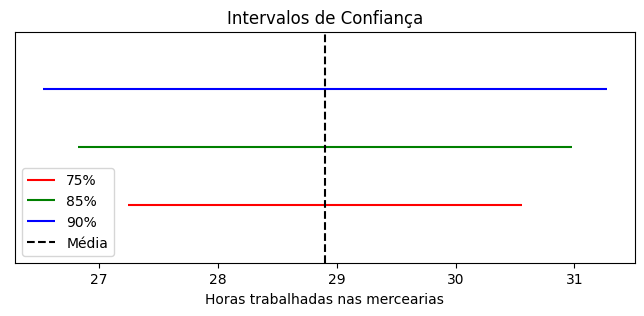

In [15]:
import matplotlib.pyplot as plt
# Níveis de confiança
niveis = [0.75, 0.85, 0.90]
# Intervalo de confiança para a média populacional
intervalos = [st.norm.interval(alpha=nivel, loc=x_barra, scale=sigma_x) for nivel in niveis]
# Exibição dos intervalos e construção gráfica
plt.figure(figsize=(8,3))
ALTURAS = [0.5, 1, 1.5]
CORES = ['r', 'g', 'b']
print('*** Intervalos de conficança para a média populacional ***')
for i in range(len(niveis)):
  print(f'{niveis[i]*100}% --> ({intervalos[i][0]:.2f}, {intervalos[i][1]:.2f})')
  plt.hlines(ALTURAS[i], intervalos[i][0], intervalos[i][1], colors=CORES[i])
# Atributos do gráfico
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.ylim(0, 2)
plt.vlines(x_barra, 0, 2, colors='k', linestyles='dashed')
plt.title('Intervalos de Confiança')
plt.xlabel('Horas trabalhadas nas mercearias')
plt.legend(['75%', '85%', '90%','Média'], loc='lower left')
plt.show()

# Intervalo de confiança para a média, com $\sigma$ desconhecido (populacional)

## Distribuição T

Você seleciona aleatoriamente 16 cafeterias e mede a temperatura do café vendido em cada uma delas. A temperatura média da amostra é 162,0 ºF com desvio padrão de 10,0 ºF.

Construa os intervalos de confiança de 90% e 99% para a temperatura
média da população de cafés vendidos.

In [16]:
# Níveis de confiança
niveis = [0.90, 0.99]
# Atributos da distribuição
x_barra, std_amostral = 162, 10
num_amostras = 16
graus_liberdade = num_amostras - 1
# Intervalo de confiança para a média populacional
intervalos = [st.t.interval(alpha=nivel, df=graus_liberdade, loc=x_barra,
                            scale=std_amostral/num_amostras**0.5) for nivel in niveis]
# Exibição dos intervalos
print('*** Intervalos de conficança para a média populacional ***')
for i in range(len(niveis)):
  print(f'{niveis[i]*100}% --> ({intervalos[i][0]:.2f}, {intervalos[i][1]:.2f})')

*** Intervalos de conficança para a média populacional ***
90.0% --> (157.62, 166.38)
99.0% --> (154.63, 169.37)


C:\Users\Pichau\AppData\Local\Temp\ipykernel_7988\2139331453.py:8: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  intervalos = [st.t.interval(alpha=nivel, df=graus_liberdade, loc=x_barra,


Considere o conjunto de dados a seguir (amostra de uma população). Construa um intervalo de confiança com 95% de confiança que contenha a média poulacional. Assuma que a população é normalmente distribuída.

*NOTA:* Para estimar o erro padrão da média ($s/\sqrt{n}$), use o método *sem* (standard error of the mean) do módulo *stats*.

In [17]:
import numpy as np
# Dados amostrais
amostras = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3,
            3, 4, 4, 5, 5, 5, 6, 7, 8, 10]
# Nível de confiança
nivel = 0.95
# Atributos da distribuição
x_barra = np.mean(amostras)
erro_padrao = st.sem(amostras)
num_amostras = 20
graus_liberdade = num_amostras - 1
# Intervalo de confiança
intervalo = st.t.interval(alpha=nivel, df=graus_liberdade,
                          loc=x_barra, scale=erro_padrao)
print(f'Intervalo de confiança: ({intervalo[0]:.2f}, {intervalo[1]:.2f})')

Intervalo de confiança: (2.76, 5.04)


C:\Users\Pichau\AppData\Local\Temp\ipykernel_7988\533345881.py:13: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  intervalo = st.t.interval(alpha=nivel, df=graus_liberdade,


# A Distribuição Chi-Quadrado
Se a variável aleatória $x$ tem uma distribuição normal com desvio padrão $\sigma$, então

\begin{align}
        \chi^2=\frac{(n-1)s^2}{\sigma^2}
\end{align}

resulta em uma distribuição qui-quadrado com $n – 1$ graus de liberdade, para amostras de qualquer tamanho $n > 1$.

No Python, usaremos o método *pdf* *(probability density function)* da classe *stats.chi2* (biblioteca *scipy*).

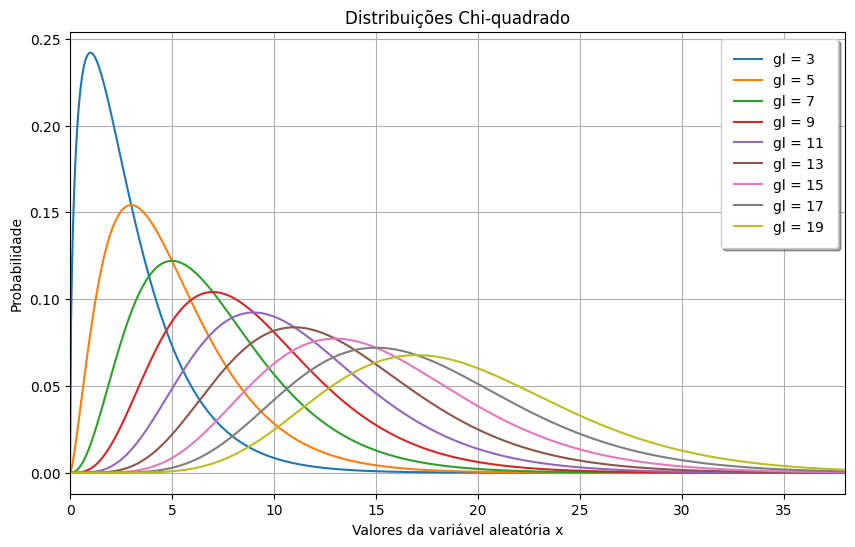

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
# Geração da lista de graus de liberdade para a visualização (de 3 a 19)
gl = list(range(3, 21, 2))
# Geração de QUANT pontos no intervalo entre INICIO e FIM
QUANT, INICIO, FIM = 750, 0, max(gl)*2
# Tamanho da figura
plt.figure(figsize=(10, 6))
# Plotagem dos gráficos
for grau in gl:
  # Determinação da distribuição chi-quadrado, com o correspondente gl
  chiquad = st.chi2(df=grau)
  x = np.linspace(INICIO, FIM, QUANT)
  # Determinação da função densidade de probabilidade
  y = chiquad.pdf(x)
  plt.plot(x, y, label='gl = '+ str(grau))
# Atributos do gráfico
plt.legend(frameon=True, fancybox=True, framealpha=1,
           shadow=True, borderpad=1)
plt.xlim(0, max(gl)*2)
plt.title('Distribuições Chi-quadrado')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('Probabilidade')
plt.grid(True)
plt.show()

Exercício: Encontre os valores críticos $\chi^2_R$
e $\chi^2_L$ para um intervalo de confiança
de 95% quando o tamanho da amostra é 18.

In [18]:
# Criação da distribuição chi-quadrado com 17 grau de liberdade
AMOSTRAS = 18
distchi2 = st.chi2(df=AMOSTRAS-1)
# Nível de confiança
confianca = 0.95
# Determinação dos valores críticos
x2L = distchi2.ppf((1-confianca)/2)
x2R = distchi2.ppf((1+confianca)/2)
# Exibição dos valores
print(f'Valor crítico à esquerda = {x2L:.3f}')
print(f'Valor crítico à direita = {x2R:.3f}')

Valor crítico à esquerda = 7.564
Valor crítico à direita = 30.191


## Intervalos de Confiança para $\sigma^2$ e $\sigma$

Você seleciona aleatoriamente e pesa as 30 unidades de uma amostra de um antialérgico. O desvio padrão da amostra é de 1,20 miligrama. Supondo que os pesos são normalmente distribuídos, construa intervalos de confiança de 90% e 95% para a variância e o desvio padrão da população de pesos dos remédios.

In [19]:
# Função para o cálculo do IC
def intconf_variancia(amostras, confianca, s_amostral):
  # Distribuição chi-quadrado
  distchi2 = st.chi2(df=amostras-1)
  # Determinação dos valores críticos
  x2L = distchi2.ppf((1-confianca)/2)
  x2R = distchi2.ppf((1+confianca)/2)
  # Extremos do IC para variância
  inf = (amostras-1)*s_amostral**2/x2R
  sup = (amostras-1)*s_amostral**2/x2L
  return (inf, sup)

# Intervalos de confiança
amostras, confianca, desvpad = 30, [0.95, 0.90], 1.20
# Lista de intervalos de confiança
ICsigma2 = [intconf_variancia(amostras, conf, desvpad) for conf in confianca]
# Exibição dos IC para variância e desvio padrão
for i in range(len(confianca)):
  print(f'- Nível de confiança de {confianca[i]*100}%:')
  print(f'Variância: ({ICsigma2[i][0]:.3f}, {ICsigma2[i][1]:.3f})')
  print(f'Desvio Padrão: ({ICsigma2[i][0]**0.5:.3f}, {ICsigma2[i][1]**0.5:.3f})')

- Nível de confiança de 95.0%:
Variância: (0.913, 2.602)
Desvio Padrão: (0.956, 1.613)
- Nível de confiança de 90.0%:
Variância: (0.981, 2.358)
Desvio Padrão: (0.991, 1.536)


**Exercício:** O puma é um dos mamíferos mais ameaçados da Terra. No sudeste dos Estados Unidos, a única população reprodutora (cerca de 100 indivíduos) pode ser encontrada no extremo sul da Flórida. A maioria dos pumas vive em:

1.   The Big Cypress National Preserve
2.   Everglades National Park
3.   The Florida Panther National Wildlife Refuge,

conforme o mapa na figura a seguir.

<img src="https://cdn.discordapp.com/attachments/653700320953761794/1029876222332772443/unknown.png" alt="mapa" >

Em um estudo recente com 12 fêmeas da espécie, foi descoberto que o tamanho médio da ninhada era de 2,4 filhotes, com um desvio padrão de 0,9 (Fonte: *U.S. Fish & Wildlife Service*).

Construa um intervalo de confiança de 90% para o desvio
padrão do tamanho da ninhada das fêmeas do puma na Flórida. Suponha que os tamanhos das ninhadas são normalmente distribuídos.

In [20]:
# Caracterização da amostra
amostras = 12
confianca = 0.9
desv_pad = 0.9
# Uso da função para cálculo de IC para a variância
ICsigma2 = intconf_variancia(amostras, confianca, desv_pad)
# Cálculo do IC para o desvio padrão
print(f'IC para o desvio padrão, confiança de {confianca*100}%:')
print(f'({ICsigma2[0]**0.5:.3f}, {ICsigma2[1]**0.5:.3f})')

IC para o desvio padrão, confiança de 90.0%:
(0.673, 1.396)
